***Neural Network & Deep Leaning Final Project***

Subject : 

AI Semen Analysis: The Future of Fertility Testing

AI-based semen analysis is revolutionizing how sperm health is evaluated. Here’s how it works:

    Automation and Precision: AI uses advanced image recognition and analysis algorithms to automate semen analysis. The AI system can quickly and precisely identify sperm count, motility, and morphology with incredible accuracy.
    Consistency: By eliminating human error, AI provides more reliable and consistent results, which helps clinicians make better-informed decisions about fertility treatment.

Why It Matters: The use of AI in semen analysis reduces the variability of results caused by human interpretation, streamlining the diagnostic process, and ensuring more accurate outcomes.
Key Differences Between Manual and AI Semen Analysis

Both manual and AI semen analysis involve examining various sperm parameters like sperm count, motility, and morphology. However, AI offers several significant advantages:
Sperm Counting

    Manual Analysis: Sperm counting is often based on a technician’s visual estimation, which can be inaccurate.
    AI Analysis: AI uses automated image recognition to count sperm with precision, analyzing thousands of images per sample for more accurate results.

Morphology Assessment

    Manual Analysis: The technician manually assesses sperm shape, which can vary based on their training and experience.
    AI Analysis: AI technology provides standardized and consistent assessments of sperm morphology, reducing human error and increasing accuracy.

Motility Analysis

    Manual Analysis: Sperm motility is assessed by observing how well sperm move, but it is subjective.
    AI Analysis: AI offers a more detailed examination of motility, breaking it down into multiple parameters to give a deeper understanding of sperm movement.

Speed and Efficiency

    Manual Analysis: The process is time-consuming and relies on human effort for assessment.
    AI Analysis: AI automates the process, speeding up the analysis and significantly reducing turnaround times, allowing for faster decision-making.

Objectivity

    Manual Analysis: Results can vary depending on the technician’s skill and judgment.
    AI Analysis: The results are consistent and objective, removing any variability and ensuring reliable results every time.

About the Dataset :

The Sperm Morphology Image Dataset (SMIDS) was collected using a smartphone-based data acquisition approach, initially introduced in for detecting and counting motile sperm cells. This approach was later validated for sperm concentration analysis, demonstrating a high correlation with manual counting results.

SMIDS was created to analyze stained sperm images and was first presented in with a hybrid morphological analysis framework. Unlike other sperm morphology datasets, abnormal sperm cells are not subdivided into separate categories.

Dataset Details

✅ Classes and Sample Distribution:

    Normal sperm: 1021 images
    Abnormal sperm: 1005 images
    Non-sperm: 974 images

✅ Image Properties:

    RGB color-space
    Possible noise, multiple sperm heads, and mixed tails in some images

Setup

In [30]:
#Import of basic libraries

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
#Image folder to variable assignation

normal_folder = 'Normal_Sperm'
abnormal_folder = 'Abnormal_Sperm'
non_sperm_folder = 'Non-Sperm'

In [32]:
# Function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, label, target_size=(128, 128)):
    images = []
    labels = []
    
    # Loop over the images in the folder
    for filename in os.listdir(folder):
        if filename.endswith('.bmp'):
            img_path = os.path.join(folder, filename)
            
            # Open the image using PIL
            img = Image.open(img_path)
            
            # Resize the image to a consistent shape
            img = img.resize(target_size)
            
            # Convert the image to a numpy array and normalize pixel values to range [0, 1]
            img_array = np.array(img) / 255.0  # Normalization
            
            images.append(img_array)
            labels.append(label)
    
    return images, labels

In [33]:
# Load and preprocess the images from each folder
normal_images, normal_labels = load_and_resize_images_from_folder(normal_folder, 0)  # 0 for normal sperm
abnormal_images, abnormal_labels = load_and_resize_images_from_folder(abnormal_folder, 1)  # 1 for abnormal sperm
non_sperm_images, non_sperm_labels = load_and_resize_images_from_folder(non_sperm_folder, 2)  # 2 for non sperm

In [34]:
# Combine all images and labels
all_images = np.array(normal_images + abnormal_images + non_sperm_images)
all_labels = np.array(normal_labels + abnormal_labels + non_sperm_labels)

In [35]:
# Shuffle the dataset (optional)
indices = np.random.permutation(all_images.shape[0])
all_images = all_images[indices]
all_labels = all_labels[indices]

In [36]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [37]:
# Print the shape of the data
print(f'Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}')

Training set: (2400, 128, 128, 3), Validation set: (300, 128, 128, 3), Test set: (300, 128, 128, 3)


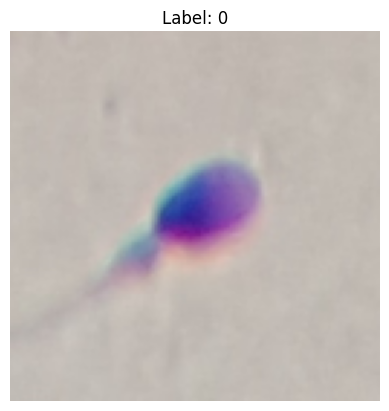

In [38]:
# Visualize a sample image
plt.imshow(X_train[0])
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()

Implementation of tensorflow framework

In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [40]:
# Define the model architecture
def create_cnn_model(input_shape=(128, 128, 3), num_classes=3):
    model = models.Sequential()
    
    # 1st Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 2nd Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 3rd Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # 4th Convolutional Block
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    
    # Flatten the feature maps into a 1D vector
    model.add(layers.Flatten())
    
    # Dense layer with Dropout for regularization
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # Output layer with softmax for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [41]:
# Create the model
model = create_cnn_model()

C:\Users\Léonard\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,568,579 (5.98 MB)

 Trainable params: 1,568,579 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Reshape the training, validation, and test data to match the input shape (height, width, channels)
X_train = X_train.reshape(-1, 128, 128, 3)
X_val = X_val.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)

First basic Model Attempt

In [44]:
# Set device to CPU
with tf.device('/CPU:0'):
    history = model.fit(
        X_train, y_train, 
        epochs=20, 
        batch_size=128, 
        validation_data=(X_val, y_val),
        verbose=1
    )

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3459 - loss: 1.1276 - val_accuracy: 0.4000 - val_loss: 1.0641
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4832 - loss: 1.0027 - val_accuracy: 0.6333 - val_loss: 0.8337
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5929 - loss: 0.8699 - val_accuracy: 0.6333 - val_loss: 0.7658
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6547 - loss: 0.7814 - val_accuracy: 0.6833 - val_loss: 0.7133
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6872 - loss: 0.7289 - val_accuracy: 0.7167 - val_loss: 0.7067
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7046 - loss: 0.6876 - val_accuracy: 0.6533 - val_loss: 0.7034
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7194 - loss: 0.6791 - val_accuracy: 0.7333 - val_loss: 0.6426
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7389 - loss: 0.6684 - val_accuracy: 0.7633 - val_loss:

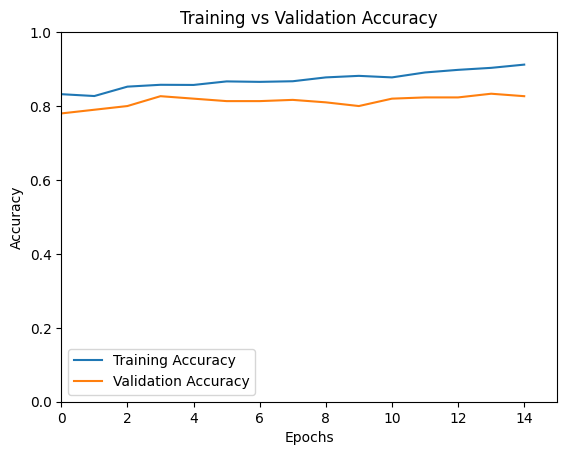

In [52]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Label the axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the axis limits from 0 to 1
plt.axis([0, len(history.history['accuracy']), 0, 1])

# Add legend and title
plt.legend()
plt.title('Training vs Validation Accuracy')

# Show the plot
plt.show()


We obtain a good logarithmic enhancement of the accuracies but we can try to have better results.

In [46]:
# Save the trained model for later use
model.save('sperm_classification_model.h5')

More advanced modeling

In [47]:
#Adding an adaptative learning rate tha reduces if the model stagnates, in order to obtain better results.

from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-4)

In [48]:
#Adding an early stopping of the epochs to avoid stagnation, overfittinf and shorten the process

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

All the callbacks are based on the val_loss variable, which we are trying to disminish as much as possible to have the best accuracy and the lowest overfitting

In [49]:
with tf.device('/CPU:0'):
    history = model.fit(
        X_train, y_train, 
        epochs=30, 
        batch_size=64, 
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stop, lr_scheduler]
    )

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 665ms/step - accuracy: 0.8407 - loss: 0.4375 - val_accuracy: 0.7800 - val_loss: 0.5495 - learning_rate: 0.0010
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 597ms/step - accuracy: 0.8187 - loss: 0.4894 - val_accuracy: 0.7900 - val_loss: 0.5203 - learning_rate: 0.0010
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 646ms/step - accuracy: 0.8408 - loss: 0.4205 - val_accuracy: 0.8000 - val_loss: 0.5129 - learning_rate: 0.0010
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 594ms/step - accuracy: 0.8558 - loss: 0.3791 - val_accuracy: 0.8267 - val_loss: 0.5072 - learning_rate: 0.0010
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 609ms/step - accuracy: 0.8646 - loss: 0.3552 - val_accuracy: 0.8200 - val_loss: 0.5172 - learning_rate: 0.0010
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 594ms/step - accuracy: 0.8747 - loss: 0.3530 - val_accuracy: 0.8133 - val_loss: 0.4939 - learning_rate: 0.0010
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 581ms/step - accuracy: 0.8537 - loss: 0.

We increased the number of epochs and reduced the batch size for a better stability.

The model stops training at the 12th epoch because the val_loss is barely changing, but we obtain about 90% accuracy on our dataset.

We tried to implement image generation with the modification of the current images, but it did not work properly and lowered our scores due to the poor quality of certain images so we prefered not to keep it in the end.

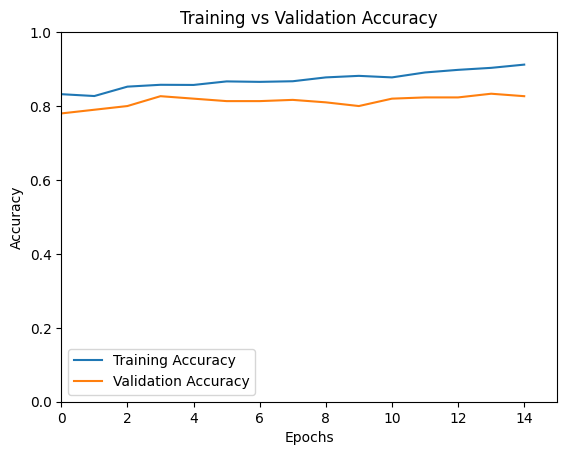

In [50]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Label the axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the axis limits from 0 to 1
plt.axis([0, len(history.history['accuracy']), 0, 1])

# Add legend and title
plt.legend()
plt.title('Training vs Validation Accuracy')

# Show the plot
plt.show()


In [51]:
# Save the trained model for later use
model.save('sperm_classification_model.h5')

Analysis of Training Results

Summary of Key Results:

    Initial Accuracy: The training accuracy starts at 85.91% and steadily improves to 91.23% by epoch 12.

    Validation Accuracy: Starts at 78.67% and improves to 81.11% by epoch 12, showing decent progress but not matching the training accuracy.

    Training Loss: Starts at 0.3558 and decreases to 0.2492 by epoch 12.

    Validation Loss: Fluctuates around 0.58-0.63, showing a pattern of slight increase over time.

Observations and Key Takeaways:

    Training Accuracy vs. Validation Accuracy:

        The training accuracy consistently improves, which indicates that the model is learning well from the training data.

        The validation accuracy improves but doesn't match the training accuracy. This might indicate that the model is beginning to overfit, as it performs better on the training data than on the validation data.

        From epoch 1 to epoch 12, val_accuracy increases from 78.67% to 81.11%, which is a reasonable improvement but could be better.

    Training Loss vs. Validation Loss:

        Training loss decreases steadily from 0.3558 to 0.2492, which is a good sign that the model is learning and making better predictions.

        Validation loss fluctuates around 0.59-0.63 and doesn't decrease as much. This could suggest that the model is struggling to generalize to the validation data, possibly because the model is overfitting or the validation data is not representative enough of the entire data distribution.

        The validation loss increases slightly towards the end (from 0.6193 to 0.6330), which might indicate overfitting if the gap between training and validation performance continues to grow.

    Learning Rate Adjustments:

        Initially, the learning rate is 2.0e-4 and is reduced to 1.0e-4 after epoch 10. This is done via the learning rate scheduler (likely ReduceLROnPlateau).

        Why this matters: Reducing the learning rate after several epochs helps the model converge more smoothly and avoids overshooting the optimal solution.

        This is likely helping the model make finer adjustments as it approaches an optimal set of weights.

    Consistency in Batch Size:

        We’ve been using a batch size of 64, which is a good balance between computation and training stability.

        Increasing or decreasing the batch size may impact training speed, stability, and generalization performance. Generally, larger batch sizes tend to give faster but noisier updates to the model's weights, while smaller batch sizes can sometimes lead to better generalization (but might require more epochs).

Bibliography : 

https://www.andrologycenter.in/blog/the-differences-between-manual-and-ai-semen-analysis/
https://www.kaggle.com/datasets/orvile/sperm-morphology-image-data-set-smids
https://academic.oup.com/humrep/article/38/Supplement_1/dead093.452/7203181